In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [4]:
mnist = fetch_openml('mnist_784', data_home='~/datasets/mnist')

In [5]:
# check dataset: 70,000 samples, 784 features
mnist.data.shape

(70000, 784)

In [6]:
Z = np.c_[mnist.target, mnist.data]
Z[:,0]

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [7]:
# split data and labels into X and Y
X = Z[:,1:]
Y = Z[:,0]

4


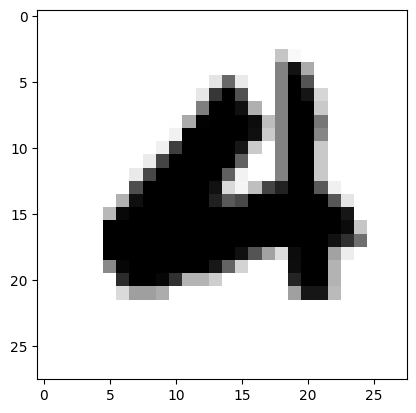

In [8]:
idx = 1030
X = np.asarray(X, dtype=int)
print(Y[idx])
img = plt.imshow(X[idx].reshape(28,28), cmap='gray_r')

In [9]:
# training set
X_train = X[0:50000]
Y_train = Y[0:50000]

# validation set
X_val = X[50000:60000]
Y_val = Y[50000:60000]

# test set
X_test = X[60000:70000]
Y_test = Y[60000:70000]
X_train.shape


(50000, 784)

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [12]:
classifier_names = [
    "Decision Tree",
    "Random Forest", 
    "Neural Net (75, 75)", 
    "Neural Net (784, 784, 784)", 
    "Naive Bayes"
]

In [13]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(hidden_layer_sizes=(75, 75)),
    MLPClassifier(hidden_layer_sizes=(784, 784, 784)),
    GaussianNB(),
]


In [14]:
for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time.time()
    clf.fit(X_train, Y_train)
    t1 = time.time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], Y_train[0:10000])
    t2 = time.time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, Y_test)
    t3 = time.time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
# default alpha=0.0001
for a in [0.0001, 0.001, 0.01, 0.1, 1]:
    mlp = MLPClassifier(hidden_layer_sizes=(75, 75), alpha=a)
    t0 = time.time()
    mlp.fit(X_train, Y_train)
    t1 = time.time()
    print(mlp.score(X_test, Y_test), t1 - t0)
for hl in [(25), (50), (50, 50), (100), (100, 100)]:
    mlp = MLPClassifier(hidden_layer_sizes=hl)
    t0 = time.time()
    mlp.fit(X_train, Y_train)
    t1 = time.time()
    print(mlp.score(X_test, Y_test), t1 - t0)

** Decision Tree
	Training time:		8.999
	Prediction time(train):	0.013
	Prediction time(test):	0.020
	Score Train: 1.000	Score Test: 0.870
** Random Forest
	Training time:		19.486
	Prediction time(train):	0.177
	Prediction time(test):	0.159
	Score Train: 1.000	Score Test: 0.968
** Neural Net (75, 75)
	Training time:		29.765
	Prediction time(train):	0.025
	Prediction time(test):	0.023
	Score Train: 0.992	Score Test: 0.964
** Neural Net (784, 784, 784)
	Training time:		127.562
	Prediction time(train):	0.132
	Prediction time(test):	0.130
	Score Train: 0.990	Score Test: 0.972
** Naive Bayes
	Training time:		0.322
	Prediction time(train):	0.170
	Prediction time(test):	0.165
	Score Train: 0.567	Score Test: 0.554
0.9664 22.689000844955444
0.9708 32.871724128723145
0.9612 18.381481170654297
0.9668 22.430360078811646
0.9746 26.354408979415894
0.9289 47.72921109199524
0.9555 34.72463393211365
0.9536 41.2457389831543
0.9593 18.604198217391968
0.9664 18.389771938323975
